MatPlotLib is probably the most difficult package on the scientific stack (Numpy, SciPy, Pandas, and SymPy for me) to learn. It is comparatively old, and was originally designed to emulate Matlab's plotting syntax. Unlike with the other packages, it's difficult to identify a consistent style. To give a very specific example, consider setting the window width on a plot to range from $x=-10$ to $x=10$. For a standalone plot one can use something like `plt.xlim(-10, 10)`. This syntax will not work if one is using subplots. Instead, subplots require one to use the object oriented approach `ax.set_xlim(-10, 10)`. I assume this sort of thing is necessary, since changing the window width of a subplot may involve more actions than simply changing the state of the object. For example if `sharex=True` then it would need to change them for all subplots as well. The non-object oriented style is clearly intended to match the Matlab syntax, which I assume people prefer. 

All this is to say that MatPlotLib is a difficult package to learn. It has the feel of something that was grown organically, rather than designed. For more perspective on this (more of the same perspective really) see [this interview](https://numfocus.org/blog/matplotlib-lead-developer-explains-why-he-cant-fix-the-docs-but-you-can) with Thomas Caswell.

On the other hand, MatPlotLib is widely used, and has very powerful features. I haven't spent much time exploring other plotting libraries so perhaps there are other mature plotting libraries that are easier to use. Assuming you intend to learn MatPlotLib, I have a few pieces of advice
* copy other code
* push yourself to do new things
* engage with a community

Most of what I have learned, has been through copying code from StackExchange and the MatPlotLib samples. For most other packages, this isn't ideal; it's sort of akin to copying homework answers instead of doing the work yourself. The idea being, that if you write your own code, you'll learn the package better and be more capable of solving novel problems. In my experience, the learning curve is far too steep and the package is too diverse to learn consistently transferable skills. If you can find some code that does exactly what you want to do, then copy it. 

Inevitably, you will find yourself wanting to do something for which you can't find example code. When this happens, don't give up! You'll have to spend some time, but it will be good practice learning the details of the package and learning how to effectively use the docs (the docs aren't bad, it's just that the package is so big and individual functions often have many parameters). The more often you persist and try to solve these problems, the faster you will become.

And don't hesitate to ask someone knowledgeable if you are truly stuck. Asking and answer questions helps both the asker and the answerer. If you don't know anyone proficient in MatPlotLib, there's always StackExchange (just be sure you read their guidelines before posting anything).

To help facilitate, this notebook will simply be a collection of examples I have found useful. If you have examples that would be helpful to include or if you have suggestions for improving these examples, please add them and submit a pull-request. Each example should run independently, in a single cell. Some examples may change default values. For consistent results, restart the kernel before running a cell.

# Default Font Size

I find the default font size to be too small in Jupyter Notebooks. The first two lines in the following example change the default font size. I often include them in a separate cell after my imports at the top of my notebooks.

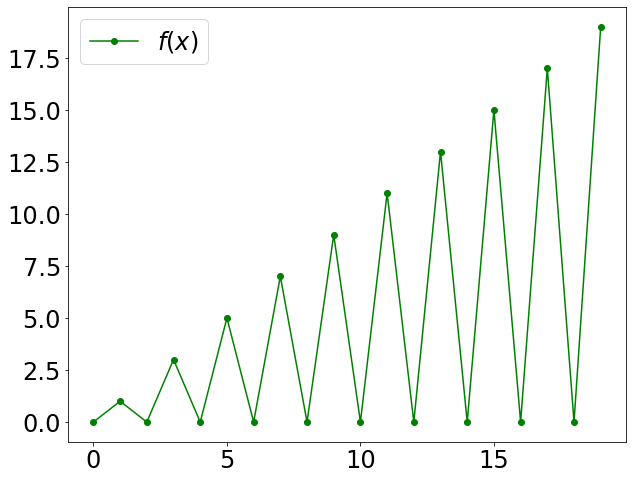

In [8]:
import matplotlib # note that this is not pyplot
import matplotlib.pyplot as plt # must be imported before the next line
matplotlib.rcParams.update({'font.size': 24}) # changes default font size

# Here is a simple example code to demonstrate its effect

xs = range(20)
ys = [x * (x%2) for x in xs]

y_style_dict = {
    'color': 'g',
    'linestyle': '-',
    'marker': 'o',
    'label': '$f(x)$'
}

plt.figure(figsize=(10,8))
plt.plot(xs, ys, **y_style_dict)
plt.legend()
plt.show()

# Default Color Pallet

I recommend manually styling each plot. If you want a consistent style over many plots use a keyword argument dictionary. That being said, here is how to change the default color pallet. **Note:** This cell changes the default pallet. If you run this cell, restart the kernel before running other cells, or rerunning this cell. 

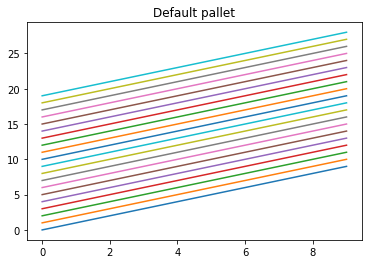

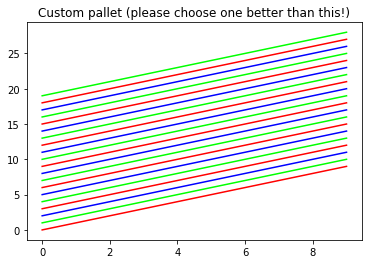

In [1]:
import matplotlib.pyplot as plt

# default pallet
xs = range(10)

for i in range(20):
    plt.plot(xs, [x+i for x in xs])
    
plt.title('Default pallet')
plt.show()

# custom pallet
pallet = [
    '#FF0000', #pure red
    '#00FF00', # pure green
    '#0000FF' # pure blue
]
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=pallet)

for i in range(20):
    plt.plot(xs, [x+i for x in xs])
plt.title('Custom pallet (please choose one better than this!)')
plt.show()

# Styling Using Dictionaries

The `plot` function has many keyword arguments. Python supports assigning keyword arguments through dictionary unpacking. This allows a style to be specified compactly in one place, and to dramatically shorten the length of lines calling the `plot` function. One can also use dictionary unpacking to create new dictionaries. In effect, values specified will cascade (like CCS) down to other dictionaries in which they are used. This makes it simple to design plot styles, consistently reuse them, and makes it very easy to make changes. For example, changing the color of lines relating to the $u$ variable 

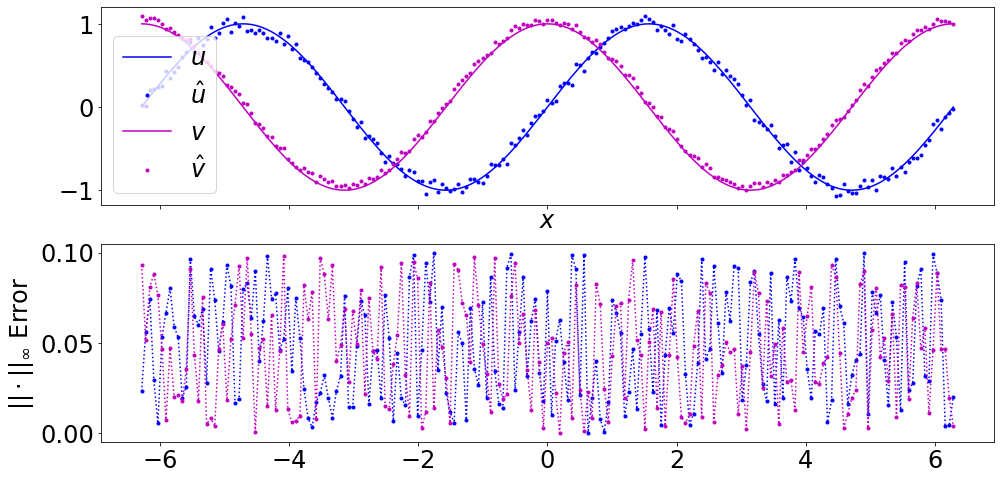

In [44]:
import matplotlib # note that this is not pyplot
import matplotlib.pyplot as plt # must be imported before the next line
matplotlib.rcParams.update({'font.size': 24}) # changes default font size

import numpy as np

xs = np.linspace(-2*np.pi, 2*np.pi, 201)
us = np.sin(xs)
vs = np.cos(xs)

u_style = {
    'color': 'b',
    'linestyle': '-',
    'marker': '',
    'label': '$u$'
}

v_style = {
    'color': 'm',
    'linestyle': '-',
    'marker': '',
    'label': '$v$'
}

noise_level = 0.1
us_noisy = us + noise_level * (2*np.random.random(len(xs)) - 1)
vs_noisy = vs + noise_level * np.random.random(len(xs))

data_style = {
    'marker': '.',
    'linestyle': ''
}

u_noisy_style = {
    **u_style, # this copies the u_style dictionary. Values specified after will overwrite it. Essentially, this keeps the same color.
    **data_style, # this keeps the color, but changes the marker and line styles
    'label': '$\hat{u}$'
}

v_noisy_style = {
    **v_style,
    **data_style,
    'label': '$\hat{v}$'
}

us_error = np.abs(us - us_noisy)
vs_error = np.abs(vs - vs_noisy)

error_style = {
    'marker': '.',
    'linestyle': ':'
}

u_error = {
    **u_style,
    **error_style,
    'label': '$|u - \hat{u}|$'
}

v_error = {
    **v_style,
    'marker': '.',
    'linestyle': ':',
    'label': '$|v - \hat{v}|$'
}

fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

axes[0].plot(xs, us, **u_style)
axes[0].plot(xs, us_noisy, **u_noisy_style)
axes[0].plot(xs, vs, **v_style)
axes[0].plot(xs, vs_noisy, **v_noisy_style)

axes[1].plot(xs, us_error, **u_error)
axes[1].plot(xs, vs_error, **v_error)

axes[0].set_xlabel('$x$')
axes[1].set_ylabel('$||\cdot||_\infty$ Error')
axes[0].legend()
plt.show()

# File Types

Often we want to save figures and insert them in other documents. This is done with `savefig` function. When doing so, consideration should be given to the file format. A basic understanding of a few image file formats will be helpful in choosing a format. I generally recommend using a vector graphic format such as `.eps` (encapsulated post script) for $\LaTeX$ documents, or `.svg` for html documents. Despite [vulnerabilities](https://en.wikipedia.org/wiki/Encapsulated_PostScript#vulnerability), encapsulated post script is supported natively in $\LaTeX$; be cautious when compiling `.eps` files from untrusted sources. The `.svg` file format is intended for webpages, is more secure, and is [supported by most major browsers](https://www.w3schools.com/html/html5_svg.asp). Vector graphic formats are not a collection of pixels, but rather a set of instructions for rendering the image. The advantage is that the images can be rescaled without losing quality. However, when creating complicated figures vector graphics can be very large in size. In this case, I would recommend either `.png` (a loss-less file format: no information is lost in compression) or `.jpeg` (a lossly file format: generally smaller file sizes, but potentially reduced imaged quality). Note that `.jpeg` files are not always smaller than their `.png` counterparts ([see here for an example](https://stackoverflow.com/questions/43970574/my-jpg-file-is-larger-than-png). The rule of thumb holds in this case because we are using many colors and complicated shapes.

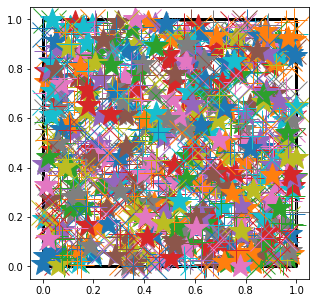

test.eps:	418204 bytes
test.svg:	245988 bytes
test.png:	154474 bytes
test.jpeg:	082921 bytes


In [43]:
import matplotlib.pyplot as plt
import numpy as np

N = 4*10**2
np.random.seed(1234) # for consistent results
xs = np.random.random(N)
ys = np.random.random(N)



plt.figure(figsize=(5, 5)) # intentionally small
plt.plot((0, 0, 1, 1, 0), (0, 1, 1, 0, 0), 'k-', linewidth=3)
for x, y in zip(xs, ys):
    plt.plot(x, y, '*', markersize=25)
    plt.plot(1-y, 1-x, '+', markersize=25)
    plt.plot(y, 1-x, 'x', markersize=25)

file_names = [
    'test.eps',
    'test.svg',
    'test.png',
    'test.jpeg'
]
for file_name in file_names:
    file_path = os.path.join('images', file_name)
    plt.savefig(file_path)
plt.show()

import os

for file_name in file_names:
    file_path = os.path.join('images', file_name)
    size = os.path.getsize(file_path)
    print(f'{file_name}:\t{size:06} bytes')

# Pickling

The `pickle` package in python is used to serialize data structures and save them to a long term storage device (hard drive, usb drive etc.). Often the data we wish to visualize is generated from expensive computations, but we will test many styles of plots before arriving at a final presentation. This requires the generated data to remain in memory throughout the plot-testing process. If the Python session is closed (kernel restart in Jupyter) the data is lost and must be regenerated in order to create new plots. 

This can be avoided by saving your data.

### Using Saved Data

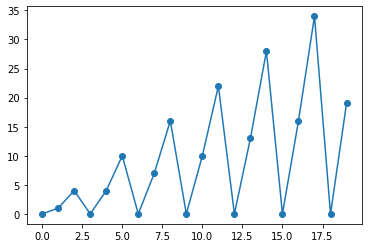

In [1]:
import matplotlib.pyplot as plt
import pickle
# load the data
file_name = 'data0.pickle'
with open(file_name, 'rb') as f:
    xs, ys = pickle.load(f)
    
plt.plot(xs, ys, 'o-')
plt.show()

### Saving Generated Data

In [2]:
import pickle
# generate some data
xs = list(range(20))
ys = [x * (x%3) for x in xs]
file_name = 'data0.pickle'
with open(file_name, 'wb') as f:
    pickle.dump((xs, ys), f)

# Animations

# Convergence Plots